In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('new_data.csv')

In [5]:
data

,price,area,rooms,ceilingHeight,kitchen_space,floor,floorsTotal,creationDate,seller,nearest_metro,...,parks_count,ponds_count,nearest_pond,time_pond,distance_pond,time_airport_via_car,distance_airport,images,city,street
0,2950000,39.50,0,2.50,0.00,1,6,2025-04-04,AGENCY,Проспект Ветеранов,...,2,1,река Кристателька,288.0,394.0,2696.0,46274.0,['//avatars.mds.yandex.net/get-realty-offers/1...,петергоф,кооперативная улица
1,2900000,23.00,0,2.80,0.00,4,11,2025-02-03,PRIVATE_AGENT,Пролетарская,...,0,1,река Нева,420.0,596.0,2452.0,29744.0,['//avatars.mds.yandex.net/get-realty-offers/1...,городской посёлок имени свердлова,западный проезд
2,2950000,24.00,0,2.70,0.00,2,11,2025-04-15,AGENCY,Пролетарская,...,0,1,река Нева,420.0,596.0,2452.0,29744.0,['//avatars.mds.yandex.net/get-realty-offers/1...,городской посёлок имени свердлова,западный проезд
3,2900000,22.60,0,2.70,0.00,4,11,2024-09-17,AGENCY,Купчино,...,0,0,Среднее Кузьминское водохранилище,375.0,521.0,2556.0,25738.0,['//avatars.mds.yandex.net/get-realty-offers/1...,пушкинский район,московское шоссе
4,2900000,21.70,0,2.70,0.00,4,11,2024-02-28,AGENCY,Купчино,...,0,0,Среднее Кузьминское водохранилище,375.0,521.0,2556.0,25738.0,['//avatars.mds.yandex.net/get-realty-offers/1...,пушкинский район,московское шоссе
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,85270000,129.70,4,3.00,17.75,2,8,2024-02-15,AGENCY,Крестовский остров,...,0,3,река Малая Нева,180.0,260.0,2336.0,32402.0,['//avatars.mds.yandex.net/get-realty-offers/1...,Санкт-Петербург,Петровский проспект
44436,53000000,143.06,5,2.74,37.00,6,12,2025-04-08,AGENCY,Приморская,...,1,1,река Малая Нева,180.0,269.0,1930.0,29440.0,['//avatars.mds.yandex.net/get-realty-offers/1...,Санкт-Петербург,Уральская улица
44437,44000000,142.64,5,2.74,11.28,8,11,2024-06-02,AGENCY,Электросила,...,0,0,Фигурный пруд,523.0,705.5,1729.0,17329.0,['//avatars.mds.yandex.net/get-realty-offers/1...,Санкт-Петербург,Благодатная улица
44438,47661000,135.40,4,3.06,17.60,3,4,2024-02-13,AGENCY,Автово,...,0,3,Невская губа,180.0,321.0,2607.0,19036.0,['//avatars.mds.yandex.net/get-realty-offers/1...,Санкт-Петербург,проспект Патриотов


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44440 entries, 0 to 44439
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 44440 non-null  int64  
 1   area                  44440 non-null  float64
 2   rooms                 44440 non-null  int64  
 3   ceilingHeight         44440 non-null  float64
 4   kitchen_space         44440 non-null  float64
 5   floor                 44440 non-null  int64  
 6   floorsTotal           44440 non-null  int64  
 7   creationDate          44440 non-null  object 
 8   seller                44440 non-null  object 
 9   nearest_metro         44440 non-null  object 
 10  time_to_metro         44440 non-null  float64
 11  transport_to_metro    44440 non-null  object 
 12  branch_metro_color    44440 non-null  object 
 13  parks_count           44440 non-null  int64  
 14  ponds_count           44440 non-null  int64  
 15  nearest_pond       

In [7]:
columns_to_keep = ['price', 'city', 'street', 'area', 'rooms', 'floor', 'floorsTotal', 'nearest_metro', 'time_to_metro', 'nearest_pond', 'distance_pond', 'seller', 'distance_airport', 'time_airport_via_car', 'kitchen_space']

data = data[columns_to_keep]

data


,price,city,street,area,rooms,floor,floorsTotal,nearest_metro,time_to_metro,nearest_pond,distance_pond,seller,distance_airport,time_airport_via_car,kitchen_space
0,2950000,петергоф,кооперативная улица,39.50,0,1,6,Проспект Ветеранов,50.0,река Кристателька,394.0,AGENCY,46274.0,2696.0,0.00
1,2900000,городской посёлок имени свердлова,западный проезд,23.00,0,4,11,Пролетарская,41.0,река Нева,596.0,PRIVATE_AGENT,29744.0,2452.0,0.00
2,2950000,городской посёлок имени свердлова,западный проезд,24.00,0,2,11,Пролетарская,41.0,река Нева,596.0,AGENCY,29744.0,2452.0,0.00
3,2900000,пушкинский район,московское шоссе,22.60,0,4,11,Купчино,29.0,Среднее Кузьминское водохранилище,521.0,AGENCY,25738.0,2556.0,0.00
4,2900000,пушкинский район,московское шоссе,21.70,0,4,11,Купчино,29.0,Среднее Кузьминское водохранилище,521.0,AGENCY,25738.0,2556.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,85270000,Санкт-Петербург,Петровский проспект,129.70,4,2,8,Крестовский остров,13.0,река Малая Нева,260.0,AGENCY,32402.0,2336.0,17.75
44436,53000000,Санкт-Петербург,Уральская улица,143.06,5,6,12,Приморская,10.0,река Малая Нева,269.0,AGENCY,29440.0,1930.0,37.00
44437,44000000,Санкт-Петербург,Благодатная улица,142.64,5,8,11,Электросила,8.0,Фигурный пруд,705.5,AGENCY,17329.0,1729.0,11.28
44438,47661000,Санкт-Петербург,проспект Патриотов,135.40,4,3,4,Автово,32.0,Невская губа,321.0,AGENCY,19036.0,2607.0,17.60


In [8]:

data['street'].fillna('unknown', inplace=True)



<ipython-input-8-1903477651>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['street'].fillna('unknown', inplace=True)
<ipython-input-8-1903477651>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['street'].fillna('unknown', inplace=True)


In [9]:
# Новые признаки
data['floor_ratio'] = data['floor'] / data['floorsTotal']
data['is_ground_floor'] = (data['floor'] == 1).astype(int)
data['is_top_floor'] = (data['floor'] == data['floorsTotal']).astype(int)
data['kitchen_area_ratio'] = data['kitchen_space'] / data['area']


<ipython-input-9-2041331679>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floor_ratio'] = data['floor'] / data['floorsTotal']
<ipython-input-9-2041331679>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_ground_floor'] = (data['floor'] == 1).astype(int)
<ipython-input-9-2041331679>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [10]:
data

,price,city,street,area,rooms,floor,floorsTotal,nearest_metro,time_to_metro,nearest_pond,distance_pond,seller,distance_airport,time_airport_via_car,kitchen_space,floor_ratio,is_ground_floor,is_top_floor,kitchen_area_ratio
0,2950000,петергоф,кооперативная улица,39.50,0,1,6,Проспект Ветеранов,50.0,река Кристателька,394.0,AGENCY,46274.0,2696.0,0.00,0.166667,1,0,0.000000
1,2900000,городской посёлок имени свердлова,западный проезд,23.00,0,4,11,Пролетарская,41.0,река Нева,596.0,PRIVATE_AGENT,29744.0,2452.0,0.00,0.363636,0,0,0.000000
2,2950000,городской посёлок имени свердлова,западный проезд,24.00,0,2,11,Пролетарская,41.0,река Нева,596.0,AGENCY,29744.0,2452.0,0.00,0.181818,0,0,0.000000
3,2900000,пушкинский район,московское шоссе,22.60,0,4,11,Купчино,29.0,Среднее Кузьминское водохранилище,521.0,AGENCY,25738.0,2556.0,0.00,0.363636,0,0,0.000000
4,2900000,пушкинский район,московское шоссе,21.70,0,4,11,Купчино,29.0,Среднее Кузьминское водохранилище,521.0,AGENCY,25738.0,2556.0,0.00,0.363636,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44435,85270000,Санкт-Петербург,Петровский проспект,129.70,4,2,8,Крестовский остров,13.0,река Малая Нева,260.0,AGENCY,32402.0,2336.0,17.75,0.250000,0,0,0.136854
44436,53000000,Санкт-Петербург,Уральская улица,143.06,5,6,12,Приморская,10.0,река Малая Нева,269.0,AGENCY,29440.0,1930.0,37.00,0.500000,0,0,0.258633
44437,44000000,Санкт-Петербург,Благодатная улица,142.64,5,8,11,Электросила,8.0,Фигурный пруд,705.5,AGENCY,17329.0,1729.0,11.28,0.727273,0,0,0.079080
44438,47661000,Санкт-Петербург,проспект Патриотов,135.40,4,3,4,Автово,32.0,Невская губа,321.0,AGENCY,19036.0,2607.0,17.60,0.750000,0,0,0.129985


In [11]:
for column in data.columns:
    print(f"Column: {column}, Values: {data[column].values}")


Column: price, Values: [ 2950000  2900000  2950000 ... 44000000 47661000 74500000]
Column: city, Values: ['петергоф' 'городской посёлок имени свердлова'
 'городской посёлок имени свердлова' ... 'Санкт-Петербург'
 'Санкт-Петербург' 'Санкт-Петербург']
Column: street, Values: ['кооперативная улица' 'западный проезд' 'западный проезд' ...
 'Благодатная улица' 'проспект Патриотов' 'Петровский проспект']
Column: area, Values: [ 39.5   23.    24.   ... 142.64 135.4  151.8 ]
Column: rooms, Values: [0 0 0 ... 5 4 4]
Column: floor, Values: [1 4 2 ... 8 3 2]
Column: floorsTotal, Values: [ 6 11 11 ... 11  4  9]
Column: nearest_metro, Values: ['Проспект Ветеранов' 'Пролетарская' 'Пролетарская' ... 'Электросила'
 'Автово' 'Чкаловская']
Column: time_to_metro, Values: [50. 41. 41. ...  8. 32. 15.]
Column: nearest_pond, Values: ['река Кристателька' 'река Нева' 'река Нева' ... 'Фигурный пруд'
 'Невская губа' 'река Ждановка']
Column: distance_pond, Values: [394.  596.  596.  ... 705.5 321.  191. ]
Column

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [13]:

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Для LightGBM нужно преобразовать разреженную матрицу в плотный формат
X_train_preprocessed = X_train_preprocessed.toarray() if hasattr(X_train_preprocessed, 'toarray') else X_train_preprocessed
X_test_preprocessed = X_test_preprocessed.toarray() if hasattr(X_test_preprocessed, 'toarray') else X_test_preprocessed



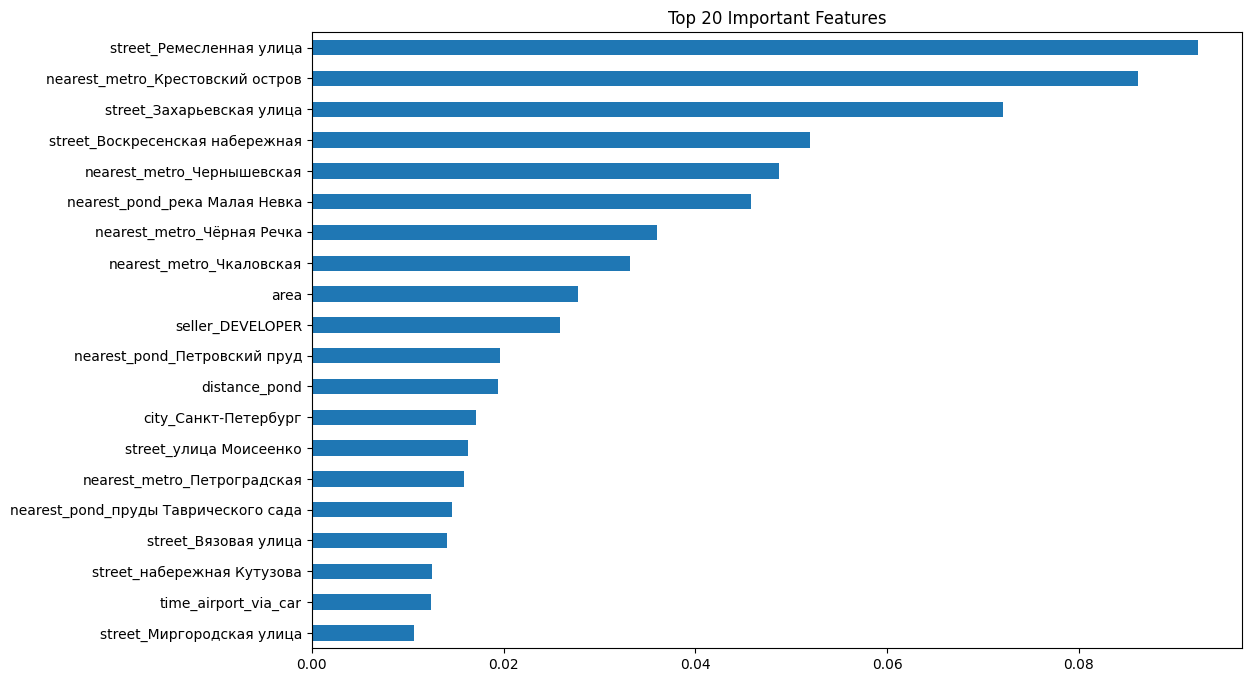

In [14]:

num_feature_names = num_features
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
feature_names = np.concatenate([num_feature_names, cat_feature_names])

# Обучение модели для оценки важности признаков
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Анализ важности признаков
feature_importances = pd.Series(model.feature_importances_, index=feature_names)
plt.figure(figsize=(12, 8))
feature_importances.sort_values().tail(20).plot(kind='barh')
plt.title('Top 20 Important Features')
plt.show()


top_features = feature_importances.sort_values(ascending=False).head(50).index
X_train_top = pd.DataFrame(X_train_preprocessed, columns=feature_names)[top_features]
X_test_top = pd.DataFrame(X_test_preprocessed, columns=feature_names)[top_features]

In [15]:
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Базовые модели с оптимизированными параметрами
base_models = [
    ('xgb', XGBRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )),
    ('lgbm', LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.05,
        num_leaves=63,
        max_depth=-1,
        bagging_fraction=0.8,
        feature_fraction=0.8
    )),
    ('rf', RandomForestRegressor(
        n_estimators=500,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=4,
        max_features='sqrt',
        random_state=42
    ))
]

# Мета-модель
meta_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8
)

# Стекинг-модель
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)


stacking_model.fit(X_train_top, y_train)

StackingRegressor(cv=5,
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learnin...
                               LGBMRegressor(bagging_fraction=0.8,
                                             feature_fraction=0.8,
                                             learning_rate=0.05,
                                             n_estimators=1000,
                                             num_leaves=63)),
                              ('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     n_estimators=500,
                                                     random_state=42))],
                  final_estimator=GradientBoostingRegressor(learning_rate=0.05,
                                                            max_depth=5,
                                                            n_estimators=200,
                                                            subsample=0.8),
                  n_jobs=-1)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Model Metrics:
MAE: 1861943.2675
MSE: 48141589505561.3359
RMSE: 6938414.0483
R2: 0.9104
MAPE: 10.5701


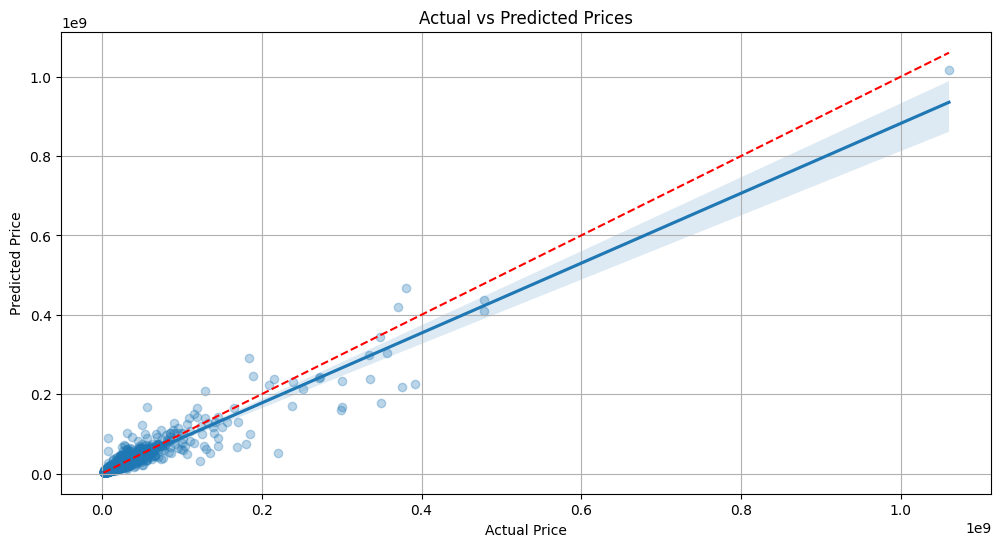

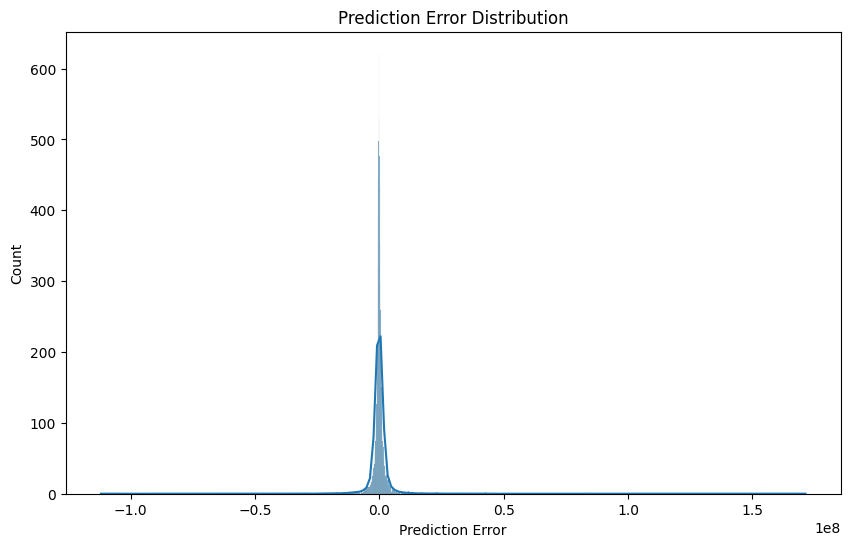

In [16]:
import seaborn as sns
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred),
        'MAPE': np.mean(np.abs((y_test - y_pred) / np.clip(y_test, 1, None))) * 100
    }

    # Визуализация результатов
    plt.figure(figsize=(12, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Prices')
    plt.grid(True)

    # Распределение ошибок
    errors = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(errors, kde=True)
    plt.title('Prediction Error Distribution')
    plt.xlabel('Prediction Error')

    return metrics

# Оценка модели
metrics = evaluate_model(stacking_model, X_test_top, y_test)
print("Model Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")